In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We model the change in the price of a stock as a geometric random walk.
This is commonly represented as a stochastic differential equation with a deterministic trend (referred to as the drift) based on the mean value of the stock and a stochastic trend based on the standard deviation of the stock. This is based on 1-D Brownian motion (also known as the Weiner Process).

$$dS = \mu * S * dt + \sigma * S * dW$$

- $dW$ is a random variable drawn from a normal distribution with mean 0 and variance $dt$.

## Implement Brownian motion with no mean (drift)

In [2]:
def brownian_motion(dt: float = 0.1, num_samples: int = 1000):
    w = np.zeros(num_samples + 1)  # initialise random variable at t=0 to 0
    t = np.linspace(0, num_samples, num_samples + 1)
    w[1 : num_samples + 1] = np.cumsum(np.random.normal(0, np.sqrt(dt), num_samples))
    return w, t

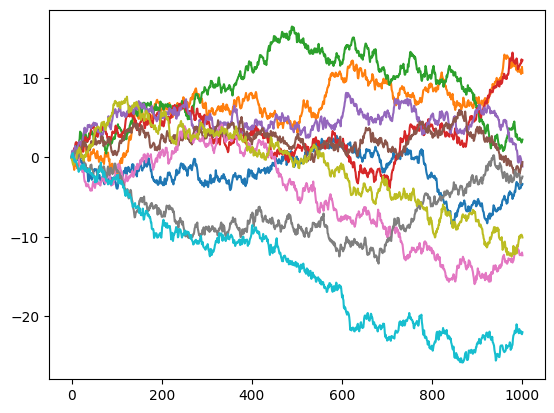

In [3]:
dt = 0.1
num_samples = 1000
for I in range(10):
    w, t = brownian_motion(dt, num_samples)
    plt.plot(t, w)

The formula $$dS = \mu * S * dt + \sigma * S * dW$$ can be rearranged as follows:
$$dS/S = \mu *  dt + \sigma * dW$$
This looks a little like the derivative of the natural logarithm of $S$
$$d(log(S)) = 1/S * dS$$

Following this, we can derive a formula for $S(t)$ as

$$S(t) = S(0)*e^{(\mu - 1/2 * \sigma^2)t + \sigma*W}$$

In [4]:
def geometric_random_walk(S0, T: int = 2, N: int = 1000, mu=0.1, sigma=0.5):
    """Simulate a geometric random walk.

    Args:
        S0: Initial position (i.e. initial stock price). Must be non-zero.
        T: Time horizon
        N: Number of samples within horizon
        mu: drift term
        sigma: stochastic term
    """
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(N)
    # N(0,dt) ~ N(0,1) * sqrt(dt)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S, t

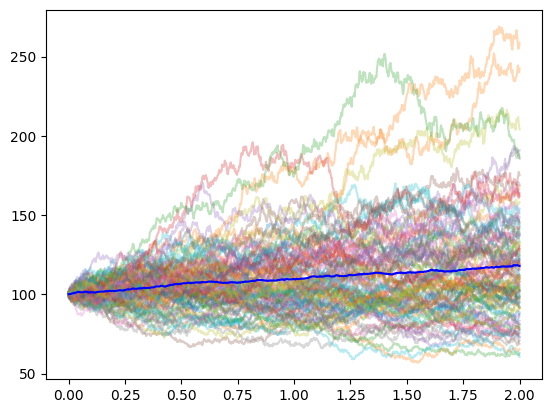

In [5]:
S0 = 100
Ss = []
ts = []
for _ in range(100):
    S, t = geometric_random_walk(S0, sigma=0.2)
    Ss.append(S)
    ts.append(t)
    plt.plot(t, S, alpha=0.3)
plt.plot(np.array(ts).mean(axis=0), np.array(Ss).mean(axis=0), "b")

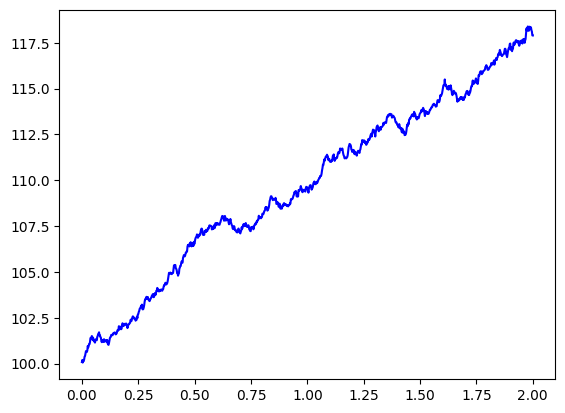

In [6]:
plt.plot(np.array(ts).mean(axis=0), np.array(Ss).mean(axis=0), "b")